# Logistic Regression

* Logistic regression is a machine learning algorithm used for classification problems. It is a supervised learning algorithm that can be used to predict the probability of occurrence of an event. The logistic regression algorithm is used to map the input data to a probability, unlike linear regression which is used to map the input data to continuous output values. The output of the logistic regression model is a probability value between 0 and 1. The output represents the probability that the class of the input data is 1. 

The input data is mapped to a probability using the sigmoid function. The sigmoid function, also called as logistic function, is a mathematical function that maps values (sum of weighted input) from -infinity to +infinity to values between 0 and 1. The sigmoid function that represents the hypothesis is defined as:

σ(z)=11+e−z

The value of z in sigmoid function represents the weighted sum of input values and can be written as the following:

z=θTx

Where θ represents the parameters. 

The output of the hypothetical model (sigmoid function output) is always between 0 and 1. If the output is close to 0, it means that the event is less likely to occur. If the output is close to 1, it means that the event is more likely to happen. For example, if the value of logistic regression model (represented using sigmoid function) is 0.8, it represents that the probability that the event will occur is 0.8 given a particular set of parameters learned using cost function optimization. For any new value X, the output of the above function will be used for making the prediction. *

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [54]:
df = pd.read_csv('/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv')

In [55]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [56]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [58]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [59]:
df.drop(['Arrival Delay in Minutes'], axis = 1,inplace= True)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,5,2,2,3,3,4,4,4,2,0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,1,3,2,3,3,1,2,1,174
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,2,4,4,3,4,2,3,2,155
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,2,3,3,2,3,2,1,2,193


# Process The Catagrical Data or Dummy

In [60]:
m=(df.dtypes == 'object')
object_col=list(m[m].index)
print('categorical variables: ')
print(object_col)


categorical variables: 
['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [61]:
for x in object_col :
    print('unique values in ',x,' column : ' , df[x].unique())

unique values in  satisfaction  column :  ['satisfied' 'dissatisfied']
unique values in  Gender  column :  ['Female' 'Male']
unique values in  Customer Type  column :  ['Loyal Customer' 'disloyal Customer']
unique values in  Type of Travel  column :  ['Personal Travel' 'Business travel']
unique values in  Class  column :  ['Eco' 'Business' 'Eco Plus']


In [62]:
df = pd.get_dummies(df, columns=['satisfaction', 'Gender', 'Customer Type'
                                 , 'Type of Travel', 'Class'], drop_first=True)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                129880 non-null  int64
 1   Flight Distance                    129880 non-null  int64
 2   Seat comfort                       129880 non-null  int64
 3   Departure/Arrival time convenient  129880 non-null  int64
 4   Food and drink                     129880 non-null  int64
 5   Gate location                      129880 non-null  int64
 6   Inflight wifi service              129880 non-null  int64
 7   Inflight entertainment             129880 non-null  int64
 8   Online support                     129880 non-null  int64
 9   Ease of Online booking             129880 non-null  int64
 10  On-board service                   129880 non-null  int64
 11  Leg room service                   129880 non-null  int64
 12  Ba

In [64]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'satisfaction_satisfied', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()

<AxesSubplot:xlabel='Age', ylabel='Density'>

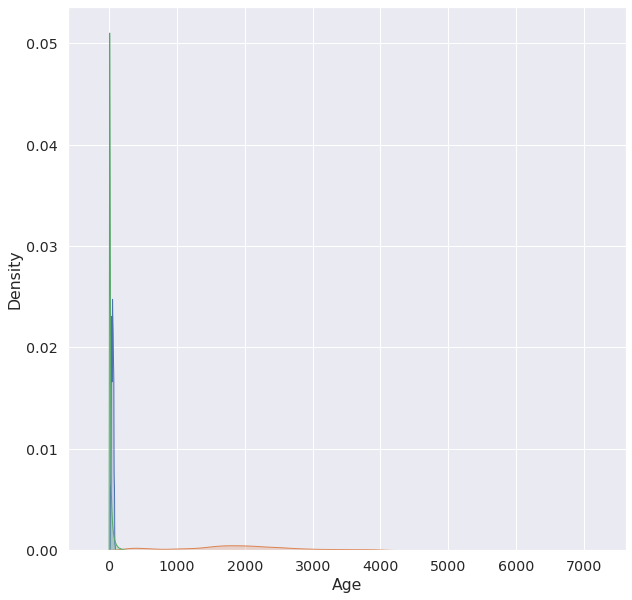

In [66]:
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Flight Distance'], shade=True)
sns.kdeplot(df['Departure Delay in Minutes'], shade=True)



In [67]:
for column in ['Age','Flight Distance','Departure Delay in Minutes']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

<AxesSubplot:xlabel='Age', ylabel='Density'>

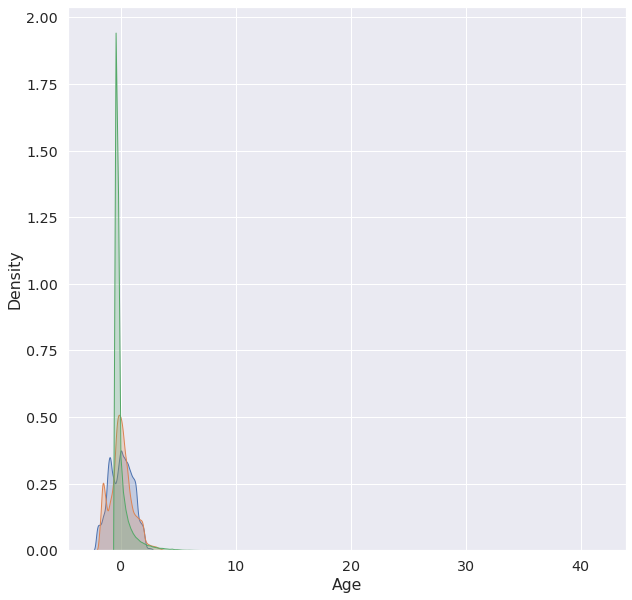

In [68]:
sns.kdeplot(df['Age'], shade=True)
sns.kdeplot(df['Flight Distance'], shade=True)
sns.kdeplot(df['Departure Delay in Minutes'], shade=True)


# Data Split to Train and Test Sets

In [69]:
x =df.drop(['satisfaction_satisfied'], axis = 1)

In [70]:
y = df['satisfaction_satisfied']


In [71]:
x.shape

(129880, 22)

In [72]:
y.shape

(129880,)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=90)

# Fitting Logistic Regression 

In [74]:
from sklearn.linear_model import LogisticRegression
classfier = LogisticRegression(solver='liblinear', random_state=1)
classfier.fit(x_train , y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [75]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(random_state=42)
lg.fit(x_train , y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [76]:
y_pred = lg.predict(x_test)


In [77]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [78]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12061,  2711],
       [ 2669, 15029]])

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     14772
           1       0.85      0.85      0.85     17698

    accuracy                           0.83     32470
   macro avg       0.83      0.83      0.83     32470
weighted avg       0.83      0.83      0.83     32470



# Great Work!
# Ahmed Khairullah